In [1]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve


In [2]:
# Загрузка данных
data = pd.read_csv('train_1.csv', sep =',')
data


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
5,41415,SCH,M,27,Y,N,0,1,0,1,1,15000,N,0
6,28436,SCH,M,39,N,N,0,0,0,1,2,28000,N,0
7,68769,SCH,F,39,N,N,0,0,1,2,3,45000,N,0
8,38424,SCH,F,50,Y,N,1,0,0,1,1,30000,N,0
9,4496,UGR,F,54,N,N,0,0,1,2,3,24000,N,0


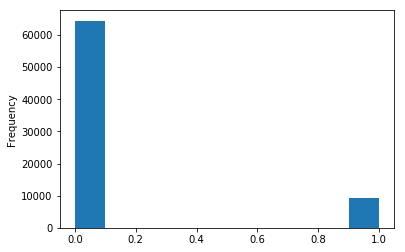

In [3]:
#Посмотрим соотношение между наличием и отсутствием дефолта
data['default'].plot(kind = 'hist')

In [4]:
# Проанализируем данные на наличие пропущенных значений 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
client_id           73799 non-null int64
education           73492 non-null object
sex                 73799 non-null object
age                 73799 non-null int64
car                 73799 non-null object
car_type            73799 non-null object
decline_app_cnt     73799 non-null int64
good_work           73799 non-null int64
bki_request_cnt     73799 non-null int64
home_address        73799 non-null int64
work_address        73799 non-null int64
income              73799 non-null int64
foreign_passport    73799 non-null object
default             73799 non-null int64
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [5]:
# Количество пропусков в поле "Education"
sum(data['education'].isna())

307

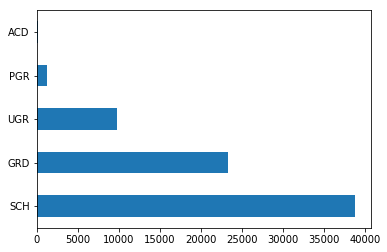

In [6]:
# Распределение признака "Education"
data['education'].value_counts().plot(kind = 'barh')

In [7]:
# Заполним пустые значения в поле "Education" значением 'Unknown'
data['education'] = data['education'].fillna('Unknown')

In [8]:
# Количество значений в группах
data.groupby('education').count()[['client_id']]

,client_id
education,
ACD,194
GRD,23365
PGR,1257
SCH,38860
UGR,9816
Unknown,307


In [9]:
# Проверим теперь количество пропусков в поле "Education"
sum(data['education'].isna())

0

In [10]:
#На среднее значение по категориям в поле "Education"
data.groupby('education').mean()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
education,,,,,,,,,
ACD,57283.958763,40.149485,0.185567,0.469072,1.865979,1.649485,2.613402,82966.634021,0.041237
GRD,56460.425423,38.053970,0.231629,0.247935,2.153135,1.569698,2.485769,54663.948941,0.090092
PGR,55854.376293,38.252188,0.195704,0.302307,2.181384,1.573588,2.487669,77548.206046,0.064439
SCH,53699.882450,41.143850,0.287005,0.108003,1.960113,1.571976,2.491431,31960.275039,0.150592
UGR,57721.017522,34.862062,0.353606,0.169214,1.782090,1.600856,2.537490,39391.796251,0.131520
Unknown,49641.260586,41.736156,0.104235,0.153094,1.785016,1.615635,2.553746,44558.231270,0.114007


In [11]:
# Категория "Unknown" больше всего близка к "UGR", поэтому переименуем ее
data['education'] = data['education'].replace(regex='Unknown', value='UGR')
data.groupby('education').count()[['client_id']]

,client_id
education,
ACD,194
GRD,23365
PGR,1257
SCH,38860
UGR,10123


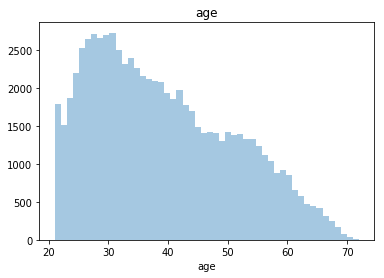

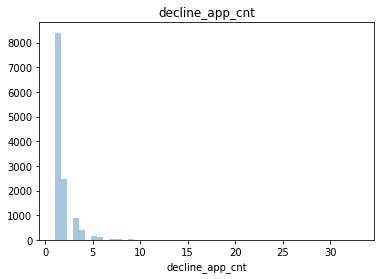

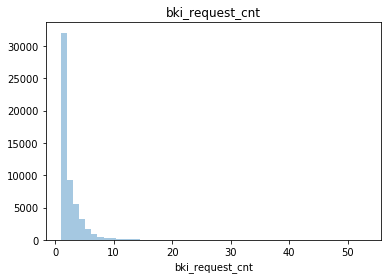

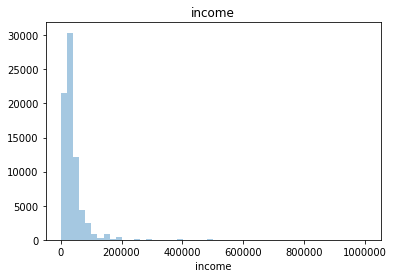

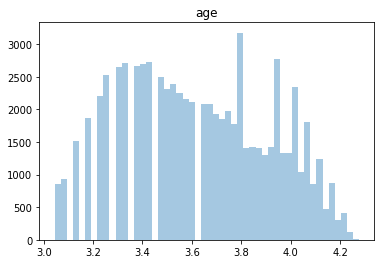

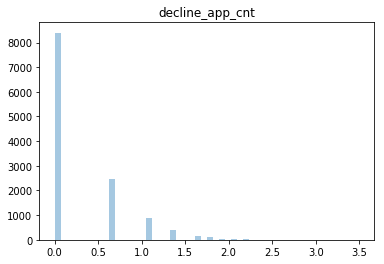

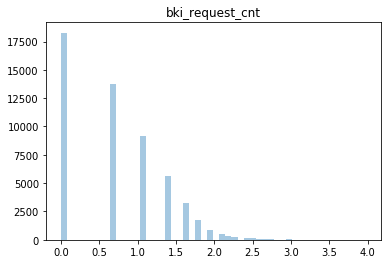

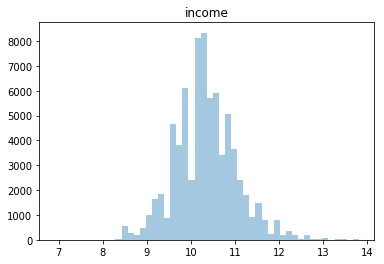

In [12]:
# Распределим признаки по категориям
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

# Построим гистограммы для числовых переменных
for i in num_cols:
    plt.figure()
    sns.distplot(data[i][data[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

# Построим гистограммы логарифмов для числовых переменных - данные стали менее смещенными
for i in num_cols:
    plt.figure()
    sns.distplot([np.log((data[i][data[i] > 0].dropna()))], kde = False, rug=False)
    plt.title(i)
    plt.show()

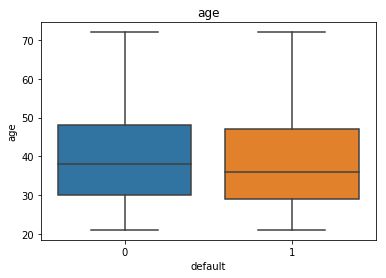

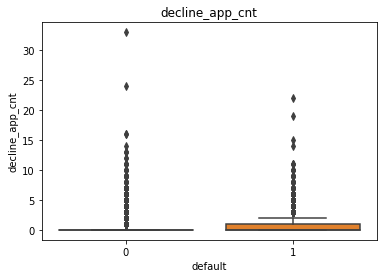

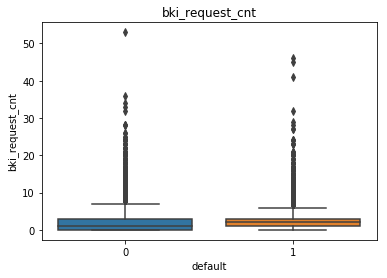

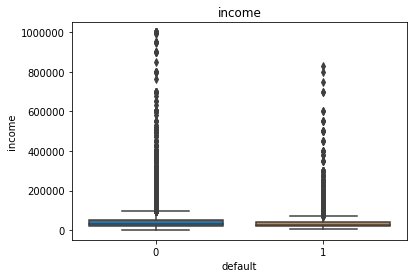

In [13]:
# Построим boxplot для численных переменных
for i in num_cols:
    plt.figure()
    sns.boxplot(x="default", y=i, data=data)
    plt.title(i)
    plt.show()

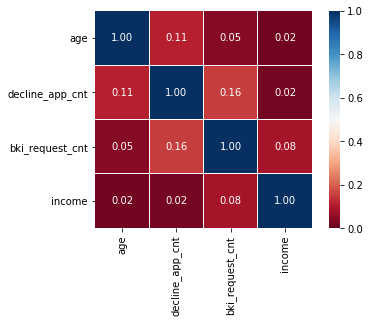

In [14]:
# Проанализируем корреляционную матрицу. Между числовыми переменными существует слабая корреляционная связь.
# Самая большая корреляция в районе 0,2 между переменными 'decline_app_cnt'  и 'bki_request_cnt'
# Оставляем все переменные в модели
sns.heatmap(data[num_cols].corr().abs(),square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu", vmin=0, vmax=1)

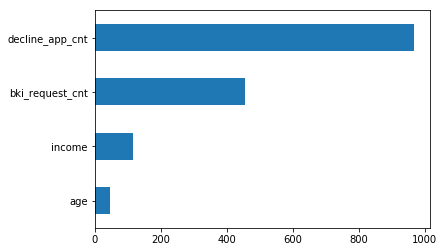

In [15]:
# На основе однофакторного дисперсионного анализа выявили признак 'decline_app_cnt' - количество отказанных прошлых заявок, 
# для которого наблюдаетсянаибольшая разница между средними значениями в двух категориях групп
imp_num = Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [16]:
# Перекодируем признаки в числовые значения
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [17]:
# Перекодируем поле 'education'
data['education'] = label_encoder.fit_transform(data['education'])
  
data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,3,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,3,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,3,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,3,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,1,1,48,0,0,0,1,1,2,3,30000,1,0


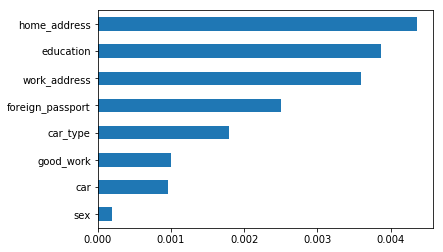

In [18]:
# Для оценки значимости категориальных и бинарных переменных будем использовать функцию mutual_info_classif из библиотеки sklearn.
# Данная функция опирается на непараметрические методы, основанные на оценке энтропии в группах категориальных переменных
# Категория домашнего адреса оказывает наиболее значимое влияение на исследуемую переменную
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [19]:
# Добавим дополнительные бинарные переменные, в т.ч. флаг наличия отказа в заявке 
data.loc[data.decline_app_cnt < 1, 'decline_app_cnt_1'] = 0
data.loc[data.decline_app_cnt >= 1, 'decline_app_cnt_1'] = 1
data.loc[data.bki_request_cnt < 1, 'bki_request_cnt_1'] = 0
data.loc[data.bki_request_cnt == 1, 'bki_request_cnt_1'] = 1
data.loc[data.bki_request_cnt == 2, 'bki_request_cnt_1'] = 2
data.loc[data.bki_request_cnt == 3, 'bki_request_cnt_1'] = 3
data.loc[data.bki_request_cnt == 4, 'bki_request_cnt_1'] = 4
data.loc[data.bki_request_cnt == 5, 'bki_request_cnt_1'] = 4
data.loc[data.bki_request_cnt > 5, 'bki_request_cnt_1'] = 5
data.loc[data.home_address < 2, 'home_address_1_1'] = 0
data.loc[data.home_address >= 2, 'home_address_1_1'] = 1

data.loc[data.income <= 14000, 'income_cat'] = 0
data.loc[((data.income > 14000) & (data.income <= 18000)), 'income_cat'] = 1
data.loc[((data.income > 18000) & (data.income <= 22000)), 'income_cat'] = 2
data.loc[((data.income > 22000) & (data.income <= 25000)), 'income_cat'] = 3
data.loc[((data.income > 25000) & (data.income <= 30000)), 'income_cat'] = 4
data.loc[((data.income > 30000) & (data.income <= 40000)), 'income_cat'] = 5
data.loc[((data.income > 40000) & (data.income <= 50000)), 'income_cat'] = 6
data.loc[((data.income > 50000) & (data.income <= 70000)), 'income_cat'] = 7
data.loc[data.income > 70000, 'income_cat'] = 8


In [20]:
data.groupby('default').mean()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,decline_app_cnt_1,bki_request_cnt_1,home_address_1_1,income_cat
default,,,,,,,,,,,,,,,,,
0,55614.538082,2.449656,0.433110,39.390504,0.332469,0.198411,0.240877,0.171031,1.933134,1.558477,2.474816,41799.713288,0.159033,0.153942,1.723501,0.541217,4.059882
1,51861.805484,2.681071,0.462335,38.525395,0.271767,0.130708,0.515472,0.122706,2.462335,1.692595,2.643833,36288.113316,0.087495,0.284571,2.073197,0.677017,3.636790


In [21]:
# Проведем dummy-кодирование для категориальных переменных
cat_cols = ['education', 'work_address', 'home_address', 'bki_request_cnt_1', 'income_cat']
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)
X_cat.shape

(73799, 26)

In [22]:
pd.set_option('display.max_columns', 50) # выведем больше колонок
data

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default,decline_app_cnt_1,bki_request_cnt_1,home_address_1_1,income_cat
0,25905,3,1,62,1,1,0,0,1,1,2,18000,0,0,0.0,1.0,0.0,1.0
1,63161,3,0,59,0,0,0,0,3,2,3,19000,0,0,0.0,3.0,1.0,2.0
2,25887,3,1,25,1,0,2,0,1,1,2,30000,1,0,1.0,1.0,0.0,4.0
3,16222,3,0,53,0,0,0,0,2,2,3,10000,0,0,0.0,2.0,1.0,0.0
4,101655,1,1,48,0,0,0,1,1,2,3,30000,1,0,0.0,1.0,1.0,4.0
5,41415,3,1,27,1,0,0,1,0,1,1,15000,0,0,0.0,0.0,0.0,1.0
6,28436,3,1,39,0,0,0,0,0,1,2,28000,0,0,0.0,0.0,0.0,4.0
7,68769,3,0,39,0,0,0,0,1,2,3,45000,0,0,0.0,1.0,1.0,6.0
8,38424,3,0,50,1,0,1,0,0,1,1,30000,0,0,1.0,0.0,0.0,4.0
9,4496,4,0,54,0,0,0,0,1,2,3,24000,0,0,0.0,1.0,1.0,3.0


In [23]:
# Логарифмируем числовые переменные 'age' и'income'
num_cols1 = ['age', 'income']
for i in num_cols1:
    data[i]=np.log(data[i])
 

In [24]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(data[num_cols].values)

In [25]:
# Объединяем полученные на предыдущих шагах датасеты
# бинарные переменные
bin_cols1 = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport', 'decline_app_cnt_1', 'home_address_1_1']

X = np.hstack([X_num, data[bin_cols1].values, X_cat])
Y = data['default'].values

In [26]:
# Размер получившегося массива
X.shape

(73799, 37)

In [27]:
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


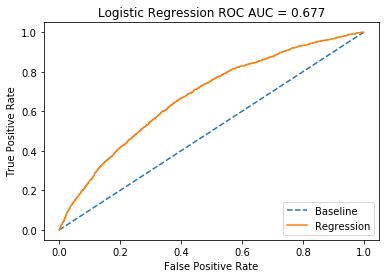

In [28]:
# Построим логистическую модель и ROC-кривую для нее
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nataly\Anaconda3\lib\site-p

C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nataly\Anaconda3\lib\site-p

C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Лучшее Penalty: l2
Лучшее C: 1.0


C:\Users\Nataly\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


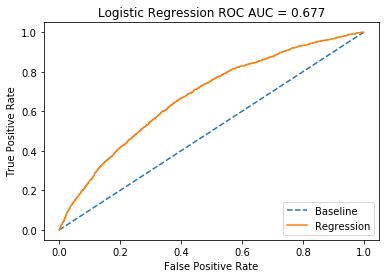

In [30]:
# ROC-кривая для best_model с учетом подобранных гиперпараметров
probs = best_model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()